In [6]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product char(200),
    quantity int,
    price REAL
)
""")
print("Database created successfully....")

sample_data = [
    ('Product A', 10, 50.0),
    ('Product B', 5, 100.0),
    ('Product C', 8, 75.0),
    ('Product A', 7, 50.0),
    ('Product B', 3, 100.0),
    ('Product C', 6, 75.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
print("Database Insert successfully....")

df = pd.read_sql_query("SELECT * FROM sales;", conn)
print("\n Data in 'sales' table:")
print(df)

conn.commit()
conn.close()



Database created successfully....
Database Insert successfully....

 Data in 'sales' table:
      product  quantity  price
0   Product A        10   50.0
1   Product B         5  100.0
2   Product C         8   75.0
3   Product A         7   50.0
4   Product B         3  100.0
5   Product C         6   75.0
6   Product A        10   50.0
7   Product B         5  100.0
8   Product C         8   75.0
9   Product A         7   50.0
10  Product B         3  100.0
11  Product C         6   75.0
12  Product A        10   50.0
13  Product B         5  100.0
14  Product C         8   75.0
15  Product A         7   50.0
16  Product B         3  100.0
17  Product C         6   75.0
18  Product A        10   50.0
19  Product B         5  100.0
20  Product C         8   75.0
21  Product A         7   50.0
22  Product B         3  100.0
23  Product C         6   75.0


 Sales Summary:

      product  total_qty  revenue
0  Product A         68   3400.0
1  Product B         32   3200.0
2  Product C         56   4200.0


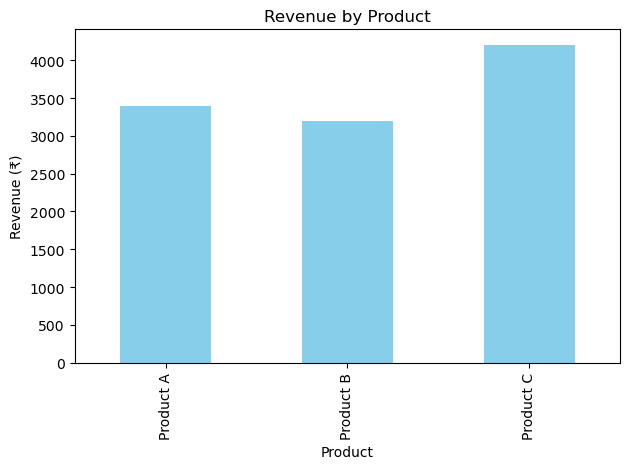

In [9]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

print(" Sales Summary:")
print("\n", df)

df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()

plt.savefig("sales_chart.png") 
plt.show()
